Lê Đỗ Thành Đạt

Homework 2

# I. Bài tập

Từ một trong các bộ dữ liệu:

* [BreastCancer](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) về chuẩn đoán ung thư vú. 
* [diabetes](https://archive.ics.uci.edu/ml/datasets/diabetes) chuẩn đoán bệnh tiểu đường.
* [hmeq](https://www.kaggle.com/ajay1735/hmeq-data) phân loại hồ sơ cho vay mua nhà.
* [BonstonHousing](https://github.com/phamdinhkhanh/datasets/blob/master/BostonHousing.csv) dự báo giá nhà ở Bonston. 
* [churn customer](https://archive.ics.uci.edu/ml/datasets/Iranian+Churn+Dataset) dự đoán khách hàng rời bỏ.

Bạn hãy thực hiện các bài tập sau: 

1. Thống kê mô tả và vẽ biểu đồ phân phối trên các trường của tập dữ liệu này. Đánh giá sơ bộ về tính chất phân phối của các biến.

2. Hãy tạo thành một pipeline hoàn chỉnh để xử lý dữ liệu từ thô sang tinh.

3. Phân chia tập train/test và lựa chọn metric cho bài toán.

4. Lựa chọn một lớp mô hình phù hợp, thực hiện cross validation để huấn luyện và đánh giá mô hình đó trên tập train.

5. Triển khai lại quá trình ở bài 4 trên nhiều lớp mô hình khác nhau.

6. Vẽ biểu đồ thể hiện kết quả của các mô hình và kết luận đâu là mô hình tốt nhất. 

7. Dựa vào lớp mô hình tốt nhất được lựa chọn, thực hiện grid search trên không gian tham số của nó.

In [ ]:
from google.colab import drive
import os

drive.mount('/content/gdrive')
#os.chdir('gdrive/MyDrive/mlhandson')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Thông tin về dữ liệu BostonHousing**

Dữ liệu về giá nhà ở Boston gồm 12 biến:

*   crin: tỷ lệ tội phạm trung bình theo thị trấn
*   zn: tỷ lệ đất thổ cư được quy hoạch cho các lô trên 25000 square feet
*   indus: tỷ lệ đất non-retail business
*   chas: biến giả sông Charles (= 1 nếu đường giáp sông; 0 nếu không)
*   nox: nồng độ oxit nitric
*   rm: số phòng trung bình trong một căn nhà
*   age: tỷ lệ các chủ sở hữu được xây dựng trước năm 1940
*   dis: khoảng cách có trọng số đến năm trung tâm việc làm ở Boston
*   rad: chỉ số về khả năng tiếp cận đường cao tốc
*   tax: thuế suất bất động sản
*   ptratio: tỷ lệ học sinh-giáo viên
*   b: $1000(B_k−0,63)^2$ trong đó $B_k$ là tỷ lệ người da đen
*   lstat: % lower status of the population
*   medv: Median value of owner-occupied homes in $1000s

Mục tiêu là xây dựng mô hình dự báo biến medv từ các biến còn lại trong bộ dữ liệu.













In [ ]:
import pandas as pd

df = pd.read_csv("../ML_Handson/BostonHousing.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


Như vậy bộ dữ liệu có 506 quan sát, 13 biến và không có missing value ở tất cả các biến

Tiếp theo tiến hành thống kê mô tả dữ liệu

In [ ]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Kết quả thống kê mô tả sơ bộ trên các biến cho thấy các biến khác biệt nhau về đơn vị lớn. Trung bình thấp nhất là trung bình của biến chas (0.0692) và cao nhất là của biến tax (408.2371). 

Ngoài ra, có thể thấy biến chas có tứ phân vị 25%, 50% và 75% đều bằng 0, điều này có thể lý giải do biến chas là biến chỉ nhận hai giá trị là 0 và 1.

**Biểu đồ phân phối các biến**

number of numeric field:  14


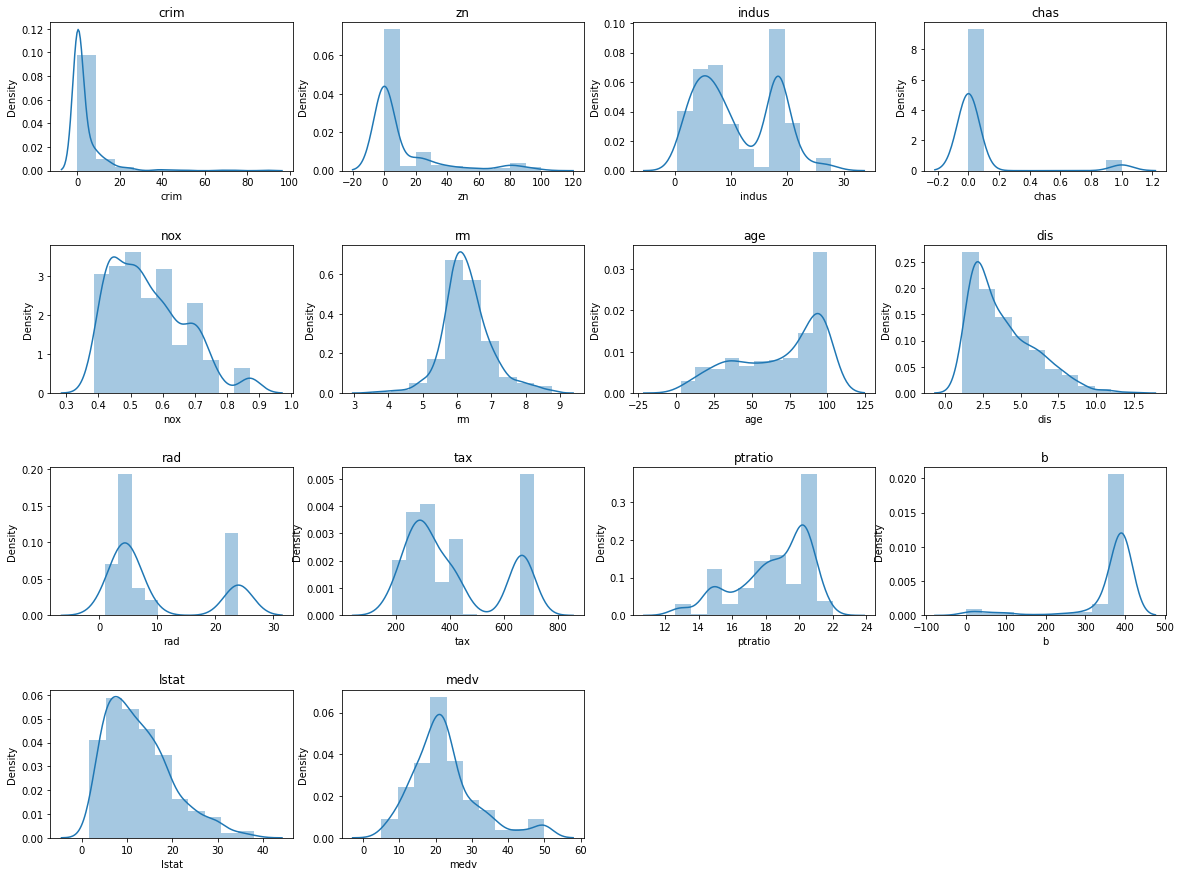

In [ ]:
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

numeric_cols = df.select_dtypes(include=['float','int']).columns

def _plot_numeric_classes(df, col, bins=10, hist=True, kde=True):
    sns.distplot(df[col],
                 bins = bins,
                 hist = hist,
                 kde = kde)

def _distribution_numeric(df, numeric_cols, row=4, col=4, figsize=(20, 15), bins = 10):
    '''
    numeric_cols: list các tên cột
    row: số lượng dòng trong lưới đồ thị
    col: số lượng cột trong lưới đồ thị
    figsize: kích thước biểu đồ
    bins: số lượng bins phân chia trong biểu đồ distribution
    '''
    print('number of numeric field: ', len(numeric_cols))
    assert row*(col-1) < len(numeric_cols)
    plt.figure(figsize = figsize)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)
    for i in range(1, len(numeric_cols)+1, 1):
      try:
        plt.subplot(row, col, i)
        _plot_numeric_classes(df, numeric_cols[i-1], bins = bins)
        plt.title(numeric_cols[i-1])
      except:
        print('Error {}'.format(numeric_cols[i-1]))
        break

_distribution_numeric(df, numeric_cols)

Ta nhận thấy biến **chas** là biến chỉ nhận giá trị 0 hoặc 1. Đa số các biến đều không có phân phối chuẩn. Trong đó, biến **mr** và biến cần dự báo **medv** có phân phối gần với phân phối chuẩn và biến giá nhà medv có giá trị tập trung trong khoảng từ 0-50. Phân phối của một số biến có độ lệch (skewness) cao nên ta có thể loại bỏ độ lệch này bằng log transformation.

**Tạo pipeline tiền xử lý dữ liệu**

Do tất cả đều là biến numeric nên ta chỉ viết pipeline tiền xử lý biến numeric 

In [ ]:
# Tiền xử lý biến numeric
num_names = list(df.select_dtypes(['float', 'int']).columns)
num_process = Pipeline(
    steps=[
           ('imputer', KNNImputer(n_neighbors=5)),
           ('scaler', MinMaxScaler())
    ]
)

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_process, num_names)
    ]
)

**Phân chia tập dữ liệu**

In [ ]:
# Chia tập dử liệu thành 2 tập train/test theo tỷ lệ 80:20.
df_train, df_test = train_test_split(df, test_size=0.2)
X_train = df_train.copy()
y_train = X_train.pop("medv")

X_test = df_test.copy()
y_test = X_test.pop("medv")
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(404, 13) (404,)
(102, 13) (102,)


In [ ]:
# Tiền xử lý biến numeric
num_names = list(X_train.select_dtypes(['float', 'int']).columns)
num_process = Pipeline(
    steps=[
           ('imputer', KNNImputer(n_neighbors=7)),
           ('scaler', MinMaxScaler())
    ]
)

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_process, num_names)
    ]
)

In [ ]:
y_train

373    13.8
343    23.9
279    35.1
360    25.0
63     25.0
       ... 
259    30.1
78     21.2
108    19.8
161    50.0
297    20.3
Name: medv, Length: 404, dtype: float64

Đây là bài toán dự báo hồi quy nên ta có thể chọn MSE là metric cho bài toán




**Câu 4**

In [ ]:
completed_pl = Pipeline(
    steps=[
            ("preprocessor", preprocessor), 
            ("regression", LinearRegression())
    ]
)

In [ ]:
# Xác định KFold
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# Xác định metric cho mô hình
metric = make_scorer(mean_squared_error)
# Đánh giá mô hình
scores = cross_val_score(completed_pl, X_train, y_train, scoring=metric, cv=cv)
print("Mean square error:%0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Mean square error:31.03 (+/- 17.22)


**Câu 5**

In [ ]:
# list các mô hình được lựa chọn (các mô hình regression)
models = [LinearRegression(), Ridge(), Lasso(), ElasticNet(), GradientBoostingRegressor(), KNeighborsRegressor(), SVR()]

# Xác định KFold
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

all_scores = []
# Đánh giá toàn bộ các mô hình trên tập K-Fold đã chia
for model in models:
  completed_pl = Pipeline(
    steps=[("preprocessor", preprocessor), ('regression', model)]
  )

  scores = cross_val_score(completed_pl, X_train, y_train, scoring=metric, cv=cv)
  all_scores.append(scores)

**Câu 6**

Text(0.5, 1.0, 'Scores Metrics')

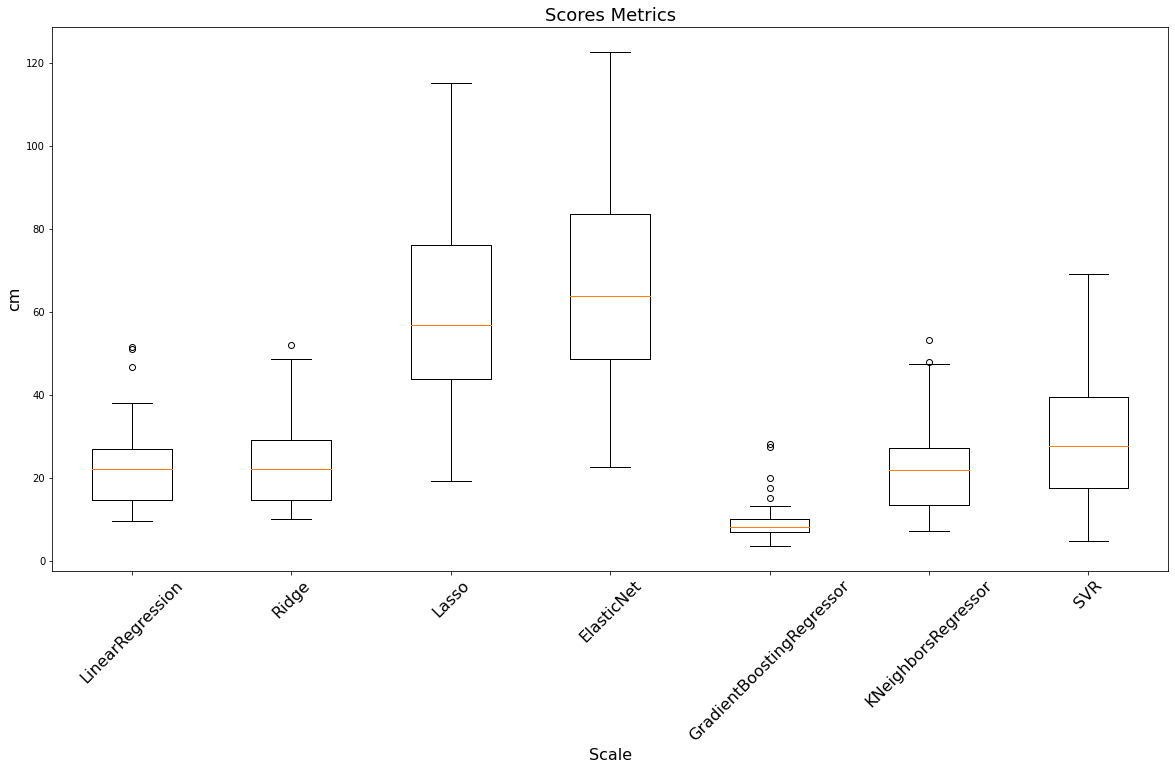

In [ ]:
import matplotlib.pyplot as plt
model_names = ['LinearRegression', 'Ridge', 'Lasso', 'ElasticNet', 'GradientBoostingRegressor', 'KNeighborsRegressor', 'SVR']

# Draw bboxplot 
plt.figure(figsize=(20, 10))
plt.boxplot(all_scores)
plt.xlabel('Scale', fontsize=16)
plt.ylabel('cm', fontsize=16)
plt.xticks(np.arange(len(model_names))+1, model_names, rotation=45, fontsize=16)
plt.title("Scores Metrics", fontsize=18)

Dựa vào các boxplot, khả năng dự báo của các mô hình khá thấp vì các mô hình đều có MSE khá lớn (điều này có thể do phân phối các biến có độ lệch lớn và cần lựa chọn biến phù hợp để đưa vào mô hình). Mô hình tốt nhất là Gradient Boosting Regression vì có MSE nhỏ nhất và độ ổn định cao nhất 

**Câu 7**